In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_csv('Abnb_paris.csv')

In [ ]:
df.head(5)

,Unnamed: 0,reviews,savwish,logreviews,logsavwish,price,rating,accommodates,extpeop,min_stay,sentiment,secdep,cleanfee,weekfee,monthfee,bedroom,bathroom,beds,review_text
0,1,10,1277,1.041393,3.106531,185,4.5,3,1,5,3.208943,1,1,1,1,1,1,1,Even if i stayed at another apartment the stay...
1,2,8,279,0.954243,2.447158,100,5.0,2,0,3,2.245883,0,0,0,0,1,1,1,"Exactly what you can see on the pictures, plus..."
2,3,31,434,1.505150,2.638489,512,5.0,10,1,3,2.509137,1,0,1,1,4,3,5,We were five colleagues staying in Lea's apart...
3,4,65,784,1.819544,2.894870,92,4.5,2,0,2,2.864322,0,0,1,1,1,1,1,"It was perfect! The location is great, easy to..."
4,5,9,621,1.000000,2.793790,71,4.5,4,1,1,1.892305,1,1,0,0,2,1,1,"Saras flat is nice and clean, she was the perf..."


In [ ]:
df.dtypes

Unnamed: 0        int64
reviews           int64
savwish           int64
logreviews      float64
logsavwish      float64
price             int64
rating          float64
accommodates      int64
extpeop           int64
min_stay          int64
sentiment       float64
secdep            int64
cleanfee          int64
weekfee           int64
monthfee          int64
bedroom           int64
bathroom          int64
beds              int64
review_text      object
dtype: object

In [ ]:
df.info

<bound method DataFrame.info of     Unnamed: 0  reviews  savwish  logreviews  logsavwish  price  rating  \
0            1       10     1277    1.041393    3.106531    185     4.5   
1            2        8      279    0.954243    2.447158    100     5.0   
2            3       31      434    1.505150    2.638489    512     5.0   
3            4       65      784    1.819544    2.894870     92     4.5   
4            5        9      621    1.000000    2.793790     71     4.5   
..         ...      ...      ...         ...         ...    ...     ...   
61          70        2       21    0.477121    1.342423     84     5.0   
62          71       60      879    1.785330    2.944483     84     5.0   
63          72       37      732    1.579784    2.865104    112     4.5   
64          74       27      508    1.447158    2.706718    128     4.5   
65          75       67      305    1.832509    2.485721     85     4.5   

    accommodates  extpeop  min_stay  sentiment  secdep  cleanfee  weekfee  \
0              3        1         5   3.208943       1         1        1   
1              2        0         3   2.245883       0         0        0   
2             10        1         3   2.509137       1         0        1   
3              2        0         2   2.864322       0         0        1   
4              4        1         1   1.892305       1         1        0   
..           ...      ...       ...        ...     ...       ...      ...   
61             2        0         1   1.735375       0         1        0   
62             2        0         1   2.917489       1         1        1   
63             2        0         1   2.110690       1         1        1   
64             3        1         1   2.882002       0         0        0   
65             2        1         1   1.371467       0         0        1   

    monthfee  bedroom  bathroom  beds  \
0          1        1         1     1   
1          0        1         1     1   
2          1        4         3     5   
3          1        1         1     1   
4          0        2         1     1   
..       ...      ...       ...   ...   
61         0        1         1     1   
62         1        1         1     1   
63         1        1         1     1   
64         0        2         1     1   
65         1        1         1     1   

                                          review_text  
0   Even if i stayed at another apartment the stay...  
1   Exactly what you can see on the pictures, plus...  
2   We were five colleagues staying in Lea's apart...  
3   It was perfect! The location is great, easy to...  
4   Saras flat is nice and clean, she was the perf...  
..                                                ...  
61  This was my first time using airbnb and what a...  
62  Phillipe, Thanks so much for the lovely stay. ...  
63  We arrived late to Leece due to all trains bei...  
64  We really felt at home in the nicely decorated...  
65  Fantastic stay with jane. Lovely apartment, lo...  

[66 rows x 19 columns]>

In [ ]:
df.describe()

,Unnamed: 0,reviews,savwish,logreviews,logsavwish,price,rating,accommodates,extpeop,min_stay,sentiment,secdep,cleanfee,weekfee,monthfee,bedroom,bathroom,beds
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,36.166667,40.393939,654.924242,1.322895,2.575108,156.151515,4.765152,3.363636,0.363636,2.272727,2.345701,0.636364,0.439394,0.636364,0.606061,1.242424,1.075758,1.681818
std,21.822771,43.934174,676.399798,0.569762,0.522341,120.149553,0.280380,1.966147,0.484732,1.259370,0.630660,0.484732,0.500117,0.484732,0.492366,0.804996,0.615457,1.290904
min,1.000000,1.000000,13.000000,0.301030,1.146128,40.000000,4.000000,1.000000,0.000000,1.000000,0.810741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,17.250000,7.250000,189.000000,0.915878,2.278594,98.000000,4.500000,2.000000,0.000000,1.000000,1.843812,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,35.500000,25.000000,449.500000,1.413685,2.653692,123.000000,5.000000,3.000000,0.000000,2.000000,2.330250,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,54.750000,64.750000,841.000000,1.817886,2.924970,181.750000,5.000000,4.000000,1.000000,3.000000,2.825839,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,75.000000,218.000000,3429.000000,2.340444,3.535294,853.000000,5.000000,11.000000,1.000000,5.000000,4.142957,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,8.000000


In [ ]:
df.tail(5)

,Unnamed: 0,reviews,savwish,logreviews,logsavwish,price,rating,accommodates,extpeop,min_stay,sentiment,secdep,cleanfee,weekfee,monthfee,bedroom,bathroom,beds,review_text
61,70,2,21,0.477121,1.342423,84,5.0,2,0,1,1.735375,0,1,0,0,1,1,1,This was my first time using airbnb and what a...
62,71,60,879,1.785330,2.944483,84,5.0,2,0,1,2.917489,1,1,1,1,1,1,1,"Phillipe, Thanks so much for the lovely stay. ..."
63,72,37,732,1.579784,2.865104,112,4.5,2,0,1,2.110690,1,1,1,1,1,1,1,We arrived late to Leece due to all trains bei...
64,74,27,508,1.447158,2.706718,128,4.5,3,1,1,2.882002,0,0,0,0,2,1,1,We really felt at home in the nicely decorated...
65,75,67,305,1.832509,2.485721,85,4.5,2,1,1,1.371467,0,0,1,1,1,1,1,"Fantastic stay with jane. Lovely apartment, lo..."


In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df.columns

Index(['reviews', 'savwish', 'logreviews', 'logsavwish', 'price', 'rating',
       'accommodates', 'extpeop', 'min_stay', 'sentiment', 'secdep',
       'cleanfee', 'weekfee', 'monthfee', 'bedroom', 'bathroom', 'beds',
       'review_text'],
      dtype='object')

reviews (no of reviews received)
savwish (no. of people who added this property to wish-to-visit list)
logreview (drop this one)
logsavwish (drop this one)
extpeop (if extra people are allow to stay during your visit)
secdep (security deposit)
cleanfee (house cleaning fee)
weekfee (discount for stay for a week)
monthfee (discount for stay for a month)

In [ ]:
cols_to_keep = ["reviews", "savwish", "extpeop", "secdep", "cleanfee", "weekfee", "monthfee", 'review_text']
df = df[cols_to_keep]

In [ ]:
df.head(5)

,reviews,savwish,extpeop,secdep,cleanfee,weekfee,monthfee,review_text
0,10,1277,1,1,1,1,1,Even if i stayed at another apartment the stay...
1,8,279,0,0,0,0,0,"Exactly what you can see on the pictures, plus..."
2,31,434,1,1,0,1,1,We were five colleagues staying in Lea's apart...
3,65,784,0,0,0,1,1,"It was perfect! The location is great, easy to..."
4,9,621,1,1,1,0,0,"Saras flat is nice and clean, she was the perf..."


In [ ]:
df.shape

(66, 8)

In [ ]:
df.isna().sum()

reviews        0
savwish        0
extpeop        0
secdep         0
cleanfee       0
weekfee        0
monthfee       0
review_text    0
dtype: int64

In [ ]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 3.3 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import re
import string
import emoji
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Remove emojis
    text = emoji.demojize(text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove extra whitespaces
    text = re.sub(' +', ' ', text)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    return text

df['clean_review_text'] = df['review_text'].apply(preprocess_text)

In [ ]:
df.head(5)

,reviews,savwish,extpeop,secdep,cleanfee,weekfee,monthfee,review_text,clean_review_text
0,10,1277,1,1,1,1,1,Even if i stayed at another apartment the stay...,even stayed another apartment stay perfect nic...
1,8,279,0,0,0,0,0,"Exactly what you can see on the pictures, plus...",exactly see pictures plus tiny worthwhile balc...
2,31,434,1,1,0,1,1,We were five colleagues staying in Lea's apart...,five colleagues staying leas apartment trainin...
3,65,784,0,0,0,1,1,"It was perfect! The location is great, easy to...",perfect location great easy find eric helpful ...
4,9,621,1,1,1,0,0,"Saras flat is nice and clean, she was the perf...",saras flat nice clean perfect host perfect pla...


In [ ]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tokenization (example using NLTK)
from nltk.tokenize import word_tokenize

df['tokens'] = df['clean_review_text'].apply(word_tokenize)

In [ ]:
df.head(5)

,reviews,savwish,extpeop,secdep,cleanfee,weekfee,monthfee,review_text,clean_review_text,tokens
0,10,1277,1,1,1,1,1,Even if i stayed at another apartment the stay...,even stayed another apartment stay perfect nic...,"[even, stayed, another, apartment, stay, perfe..."
1,8,279,0,0,0,0,0,"Exactly what you can see on the pictures, plus...",exactly see pictures plus tiny worthwhile balc...,"[exactly, see, pictures, plus, tiny, worthwhil..."
2,31,434,1,1,0,1,1,We were five colleagues staying in Lea's apart...,five colleagues staying leas apartment trainin...,"[five, colleagues, staying, leas, apartment, t..."
3,65,784,0,0,0,1,1,"It was perfect! The location is great, easy to...",perfect location great easy find eric helpful ...,"[perfect, location, great, easy, find, eric, h..."
4,9,621,1,1,1,0,0,"Saras flat is nice and clean, she was the perf...",saras flat nice clean perfect host perfect pla...,"[saras, flat, nice, clean, perfect, host, perf..."


generating sentiment col on basis of clean_text review by context and sentiment base analysis

In [ ]:
# Step 2: Sentiment Analysis
# Use TF-IDF to convert text data into numerical features
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['clean_review_text'])

# Train a Support Vector Machine (SVM) model for sentiment classification
svm_model = SVC()
svm_model.fit(X, df['review_text'])

# Step 3: Contextual Analysis
# Define sarcastic patterns
sarcastic_patterns = ['not', 'never', 'as if', 'yeah right', 'sure thing']

# Function to check if a sarcastic pattern is present in the text
def check_sarcasm(text):
    for pattern in sarcastic_patterns:
        if pattern in text:
            return True
    return False

# Apply contextual analysis to generate the sentiment column
df['sentiment'] = df['clean_text'].apply(lambda text: '0' if check_sarcasm(text) else '1')

# Step 4: Save the results
df.to_csv('sentiment_analysis_results.csv', index=False)

In [ ]:
df

,reviews,savwish,extpeop,secdep,cleanfee,weekfee,monthfee,review_text,clean_review_text,tokens,clean_text,sentiment
0,10,1277,1,1,1,1,1,Even if i stayed at another apartment the stay...,even stayed another apartment stay perfect nic...,"[even, stayed, another, apartment, stay, perfe...",even stayed another apartment stay perfect . n...,0
1,8,279,0,0,0,0,0,"Exactly what you can see on the pictures, plus...",exactly see pictures plus tiny worthwhile balc...,"[exactly, see, pictures, plus, tiny, worthwhil...","exactly see picture , plus tiny worthwhile bal...",0
2,31,434,1,1,0,1,1,We were five colleagues staying in Lea's apart...,five colleagues staying leas apartment trainin...,"[five, colleagues, staying, leas, apartment, t...",five colleague staying lea 's apartment traini...,1
3,65,784,0,0,0,1,1,"It was perfect! The location is great, easy to...",perfect location great easy find eric helpful ...,"[perfect, location, great, easy, find, eric, h...","perfect ! location great , easy find . eric he...",0
4,9,621,1,1,1,0,0,"Saras flat is nice and clean, she was the perf...",saras flat nice clean perfect host perfect pla...,"[saras, flat, nice, clean, perfect, host, perf...","saras flat nice clean , perfect host . perfect...",1
...,...,...,...,...,...,...,...,...,...,...,...,...
61,2,21,0,0,1,0,0,This was my first time using airbnb and what a...,first time using airbnb great experience apart...,"[first, time, using, airbnb, great, experience...",first time using airbnb great experience . apa...,0
62,60,879,0,1,1,1,1,"Phillipe, Thanks so much for the lovely stay. ...",phillipe thanks much lovely stay marais locati...,"[phillipe, thanks, much, lovely, stay, marais,...","phillipe , thanks much lovely stay . marais lo...",0
63,37,732,0,1,1,1,1,We arrived late to Leece due to all trains bei...,arrived late leece due trains completely holid...,"[arrived, late, leece, due, trains, completely...",arrived late leece due train completely ( holi...,0
64,27,508,1,0,0,0,0,We really felt at home in the nicely decorated...,really felt home nicely decorated appartment b...,"[really, felt, home, nicely, decorated, appart...",really felt home nicely decorated appartment ....,0


In [ ]:
# Convert text data into numerical features using TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['clean_review_text'])

y = df['sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape)
print(y.shape)

(66, 5110)
(66,)


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Support Vector Machines (SVM)
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
# Implement ensemble techniques

# Bagging (Random Forest)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Boosting (AdaBoost)
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
# Stacking
base_models = [nb_model, dt_model, svm_model]
meta_model = LogisticRegression()

In [ ]:
base_model_predictions = np.column_stack([model.predict(X_train) for model in base_models])
meta_model.fit(base_model_predictions, y_train)

LogisticRegression()

In [ ]:
# Define evaluation metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [ ]:
from sklearn.metrics import classification_report

# Evaluate individual base models
nb_predictions = nb_model.predict(X_test)
nb_report = classification_report(y_test, nb_predictions)
print("Naive Bayes Model:")
print(nb_report)

dt_predictions = dt_model.predict(X_test)
dt_report = classification_report(y_test, dt_predictions)
print("Decision Tree Model:")
print(dt_report)

svm_predictions = svm_model.predict(X_test)
svm_report = classification_report(y_test, svm_predictions)
print("SVM Model:")
print(svm_report)

Naive Bayes Model:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.00      0.00      0.00         4

    accuracy                           0.71        14
   macro avg       0.36      0.50      0.42        14
weighted avg       0.51      0.71      0.60        14

Decision Tree Model:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.50      0.75      0.60         4

    accuracy                           0.71        14
   macro avg       0.69      0.72      0.69        14
weighted avg       0.77      0.71      0.73        14

SVM Model:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.25      0.40         4

    accuracy                           0.79        14
   macro avg       0.88      0.62      0.63        14
weighted avg       0.84

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report

# Evaluate ensemble methods
rf_predictions = rf_model.predict(X_test)
rf_report = classification_report(y_test, rf_predictions)
print("Random Forest Model:")
print(rf_report)

ada_predictions = ada_model.predict(X_test)
ada_report = classification_report(y_test, ada_predictions)
print("AdaBoost Model:")
print(ada_report)


Random Forest Model:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.25      0.40         4

    accuracy                           0.79        14
   macro avg       0.88      0.62      0.63        14
weighted avg       0.84      0.79      0.74        14

AdaBoost Model:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.57      1.00      0.73         4

    accuracy                           0.79        14
   macro avg       0.79      0.85      0.78        14
weighted avg       0.88      0.79      0.80        14



In [ ]:
# Predict using base models for stacking
base_model_predictions_test = np.column_stack([model.predict(X_test) for model in base_models])
stacking_predictions = meta_model.predict(base_model_predictions_test)
stacking_report = classification_report(y_test, stacking_predictions)
print("Stacking Model:")
print(stacking_report)

Stacking Model:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.00      0.00      0.00         4

    accuracy                           0.71        14
   macro avg       0.36      0.50      0.42        14
weighted avg       0.51      0.71      0.60        14



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


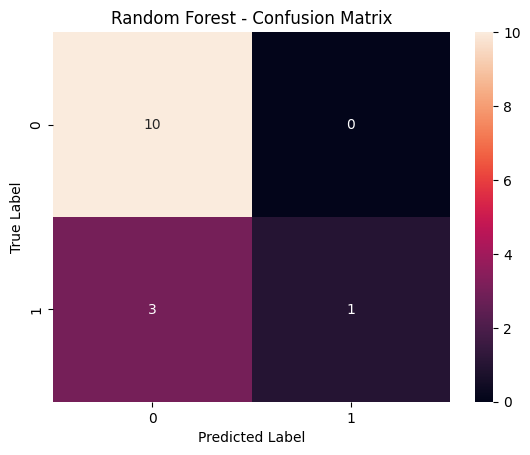

In [ ]:
# Confusion matrix for Random Forest
rf_confusion_matrix = confusion_matrix(y_test, rf_model.predict(X_test))
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

In [ ]:
y_test = y_test.astype(int)  # Convert labels to integers

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, rf_y_scores, pos_label='1')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


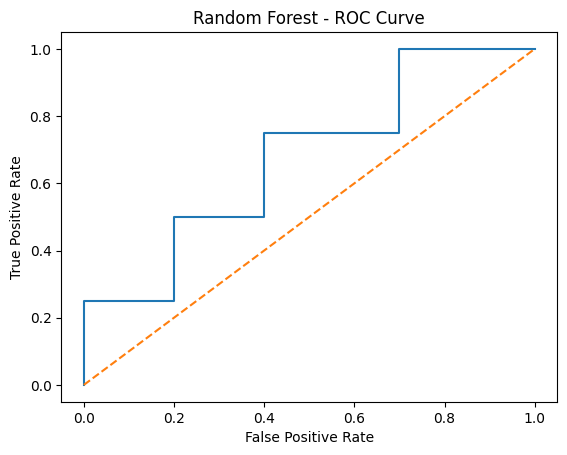

Random Forest - ROC AUC: 0.6750


In [ ]:

# ROC curve for Random Forest
rf_y_scores = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_y_scores)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Random Forest - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# ROC AUC score for Random Forest
rf_auc = roc_auc_score(y_test, rf_y_scores)
print("Random Forest - ROC AUC: {:.4f}".format(rf_auc))

not a good ROC curve

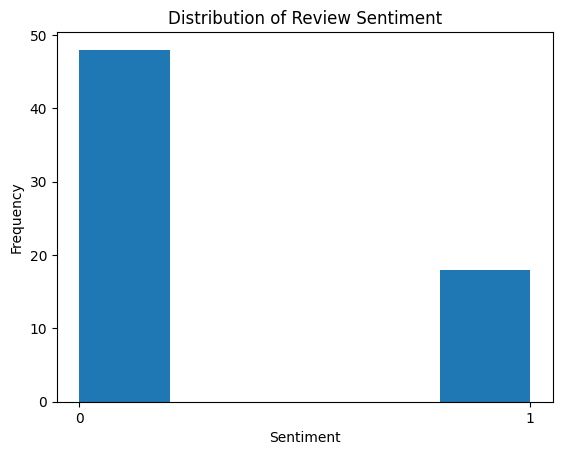

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score


# Plot the distribution of review sentiment
plt.hist(df['sentiment'], bins=5)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Review Sentiment')
plt.show()


Graph suggests there are more negative than positive reviews

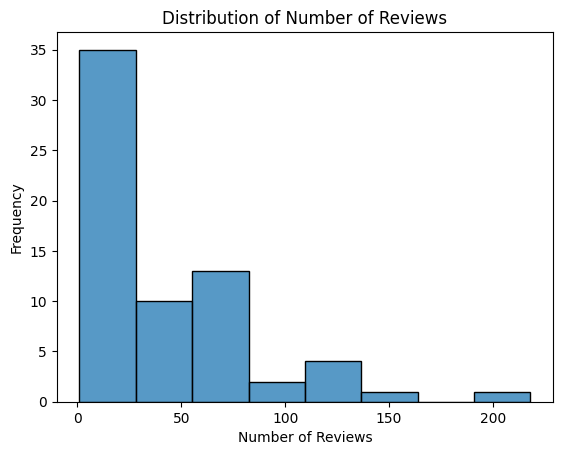

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['reviews'])
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Reviews')
plt.show()

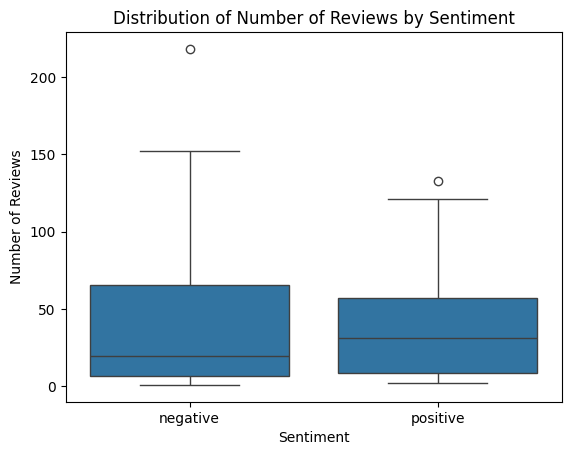

In [ ]:
sns.boxplot(x='sentiment', y='reviews', data=df)
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Number of Reviews by Sentiment')
plt.show()

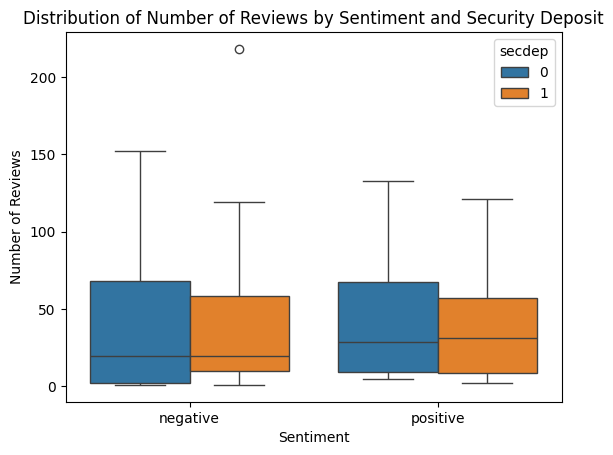

In [ ]:
sns.boxplot(x='sentiment', y='reviews', hue='secdep', data=df)
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Number of Reviews by Sentiment and Security Deposit')
plt.show()

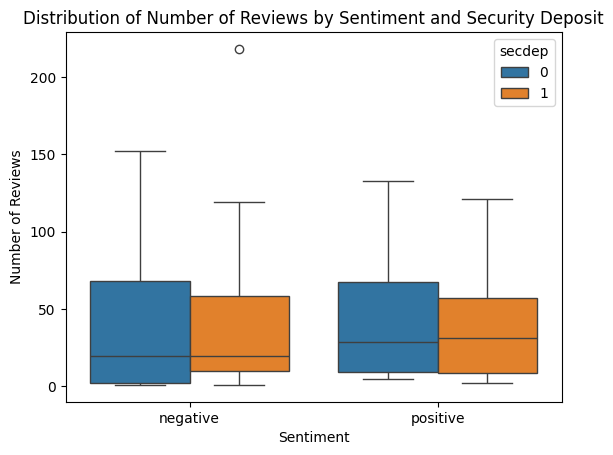

In [ ]:
sns.boxplot(x='sentiment', y='reviews', hue='secdep', data=df)
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Number of Reviews by Sentiment and Security Deposit')
plt.show()

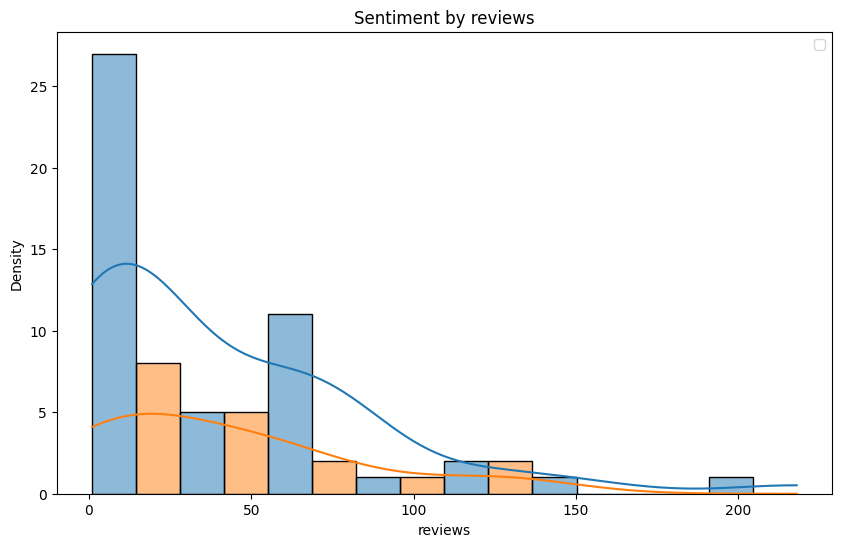

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the independent feature you want to plot
feature = 'reviews'

# Create a scatter histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=feature, hue='sentiment', multiple='dodge', kde=True)
plt.xlabel(feature)
plt.ylabel('Density')
plt.title('Sentiment by {}'.format(feature))
plt.legend()
plt.show()

#Analysis

The graph shows that the majority of reviews have a neutral sentiment score, with a smaller number of reviews having either positive or negative sentiment scores. The distribution is slightly skewed towards the positive side, indicating that there are slightly more positive reviews than negative reviews.

The kernel density estimate is a smooth curve that shows the overall shape of the distribution, while the histogram shows the number of reviews that fall into each score bin. The two methods provide different perspectives on the data, and both are useful for understanding the distribution of sentiment scores.

Overall, the graph suggests that the set of reviews is generally positive, but there is a significant number of neutral and negative reviews as well.

##question 1

To improve users' experience, Airbnb's marketing team could offer personalized property suggestions based on review sentiment, which is a stronger predictor of revenue than summary ratings. Review sentiment analysis can provide more nuanced insights into user preferences, increasing the likelihood of successful bookings.



##question 2

Yes, Airbnb needs a region-specific strategy. The analysis of Miami and Paris data shows significant differences in property performance, with Miami having a higher average daily rate and Paris having a higher occupancy rate. The company could suggest optimal pricing for hosts based on regional demand and seasonality, and provide recommendations on how to improve overall earnings, such as offering additional amenities or services.